In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Normal.metadata.xlsx
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/README.md.txt
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis.metadata.xlsx
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-173.png
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-334.png
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-309.png
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-487.png
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-178.png
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-10.png
/kaggle/input/tuberculos

In [2]:
!pip install mplcyberpunk
!pip install split-folders

import pathlib, os, random, mplcyberpunk
import splitfolders
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import BatchNormalization, Dense, Dropout, Flatten, MaxPool2D, Conv2D, Activation

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
base_path = r'/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/'
base_path = pathlib.Path(base_path)
base_path

PosixPath('/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database')

In [4]:
splitfolders.ratio(base_path, output='X_ray_Imgs', seed=123, ratio=(0.7, 0.15, 0.15),
                  group_prefix=None)

Copying files: 4200 files [00:36, 114.48 files/s]


In [5]:
NormalImgs = [fn for fn in os.listdir('/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Normal') if fn.endswith('.png')]
TuberculosisImgs = [fn for fn in os.listdir('/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis') if fn.endswith('.png')]

In [6]:
# necessary libraries
import os
import pandas as pd

# visualizations libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread
%matplotlib inline

# tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import optimizers

from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
# from keras.preprocessing.image import img_to_array

# model evaluation libraries
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras import layers
from keras.layers import Dense
from keras.optimizers import Adam
from keras import backend as K
from keras.callbacks import ModelCheckpoint

In [14]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(weights="imagenet",include_top = False,input_shape=(224,224,3))

In [15]:
for layer in vgg.layers:
    layer.trainable = False

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(1,activation="sigmoid"))

In [17]:
model.summary()
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 1)                 25089     
                                                                 
Total params: 20,049,473
Trainable params: 25,089
Non-trainable params: 20,024,384
_________________________________________________________________


In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 1)                 25089     
                                                                 
Total params: 20,049,473
Trainable params: 25,089
Non-trainable params: 20,024,384
_________________________________________________________________


In [19]:
# generating training data
print("training data :")
train_datagen= ImageDataGenerator(rescale=1/255, zoom_range=0.3, rotation_range=50, width_shift_range= 0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest', validation_split = 0.2)

train_data = train_datagen.flow_from_directory(base_path, 
                                              target_size= (224, 224),
                                              class_mode= "binary",
                                              batch_size=20,
                                              subset= "training"
                                              )

# genarating validation data
print("\nvalidation data :")
val_datagen= ImageDataGenerator(rescale= 1/255, validation_split= 0.2)

val_data= val_datagen.flow_from_directory(base_path, 
                                              target_size= (224, 224),
                                              class_mode= "binary",
                                              batch_size=20,
                                              shuffle= False,
                                              subset= "validation"
                                              )

training data :
Found 3360 images belonging to 2 classes.

validation data :
Found 840 images belonging to 2 classes.


In [ ]:
# batch_size = 32
# img_height, img_width = 200, 200
# input_shape = (img_height, img_width, 3)

# datagen= ImageDataGenerator(rescale=1/255)

# train_data = datagen.flow_from_directory('X_ray_Imgs/train', target_size=(224, 224),
#                                       batch_size=batch_size, class_mode='categorical', subset='training')

# test_data = datagen.flow_from_directory('X_ray_Imgs/test', target_size=(224, 224),
#                                       batch_size=batch_size, class_mode='categorical', shuffle=False)

# val_data = datagen.flow_from_directory('X_ray_Imgs/val/', target_size=(224, 224),
#                                       batch_size=batch_size, class_mode='categorical', shuffle=False)

In [20]:
# Number of train and validation steps
train_steps=train_data.n//train_data.batch_size
validation_steps=val_data.n//val_data.batch_size

In [22]:
# Train the model
num_epoch=10
history = model.fit(train_data,
                    steps_per_epoch=train_steps,
                    validation_data=val_data,
                    validation_steps=validation_steps,
                    epochs=num_epoch,
                    verbose=2)

Epoch 1/10
168/168 - 72s - loss: 0.2065 - accuracy: 0.9232 - val_loss: 0.1683 - val_accuracy: 0.9143 - 72s/epoch - 427ms/step
Epoch 2/10
168/168 - 70s - loss: 0.1503 - accuracy: 0.9458 - val_loss: 0.1345 - val_accuracy: 0.9357 - 70s/epoch - 416ms/step
Epoch 3/10
168/168 - 71s - loss: 0.1381 - accuracy: 0.9482 - val_loss: 0.1815 - val_accuracy: 0.9143 - 71s/epoch - 421ms/step
Epoch 4/10
168/168 - 70s - loss: 0.1255 - accuracy: 0.9506 - val_loss: 0.0875 - val_accuracy: 0.9667 - 70s/epoch - 417ms/step
Epoch 5/10
168/168 - 70s - loss: 0.1147 - accuracy: 0.9565 - val_loss: 0.0629 - val_accuracy: 0.9786 - 70s/epoch - 419ms/step
Epoch 6/10
168/168 - 72s - loss: 0.1152 - accuracy: 0.9583 - val_loss: 0.0770 - val_accuracy: 0.9726 - 72s/epoch - 428ms/step
Epoch 7/10
168/168 - 71s - loss: 0.1028 - accuracy: 0.9634 - val_loss: 0.0728 - val_accuracy: 0.9738 - 71s/epoch - 420ms/step
Epoch 8/10
168/168 - 70s - loss: 0.0942 - accuracy: 0.9652 - val_loss: 0.0914 - val_accuracy: 0.9619 - 70s/epoch - 415

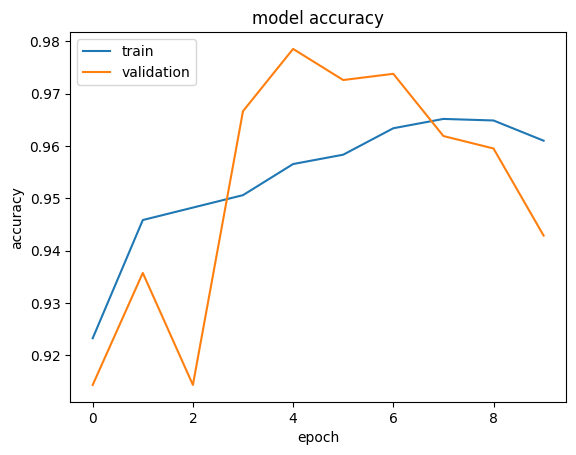

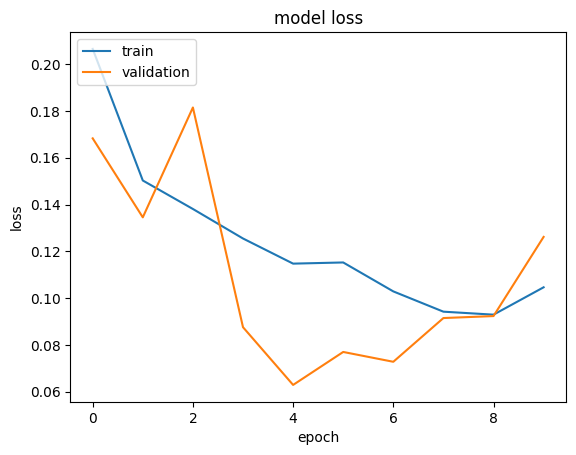

In [23]:
# Plot accuracy and loss graphs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [24]:
prediction= model.predict(val_data, steps=np.ceil(val_data.samples/val_data.batch_size), verbose=1)
prediction= (prediction > 0.5)
prediction


42/42 [==============================] - 8s 192ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [25]:
val_labels=val_data.classes
val_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

0.9428571428571428
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       700
           1       1.00      0.66      0.79       140

    accuracy                           0.94       840
   macro avg       0.97      0.83      0.88       840
weighted avg       0.95      0.94      0.94       840



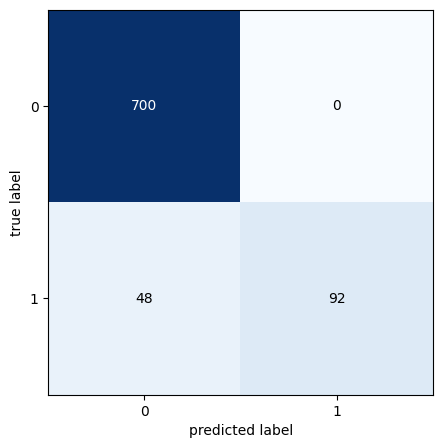

In [26]:
cm= confusion_matrix(val_data.classes, prediction)
plot_confusion_matrix(cm, figsize=(5,5))

print(accuracy_score(val_data.classes, prediction))
print(classification_report(val_data.classes, prediction))

In [27]:
# Importing the metrics package from sklearn library
from sklearn import metrics
# Creating the confusion matrix
cm = metrics.confusion_matrix(val_data.classes, prediction)
# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,700,0
Actual Positive,48,92


In [28]:
# Creating a function to report confusion metrics
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')
    
confusion_metrics(cm)

True Positives: 92
True Negatives: 700
False Positives: 0
False Negatives: 48
--------------------------------------------------
Accuracy: 0.94
Mis-Classification: 0.06
Sensitivity: 0.66
Specificity: 1.0
Precision: 1.0
f_1 Score: 0.79


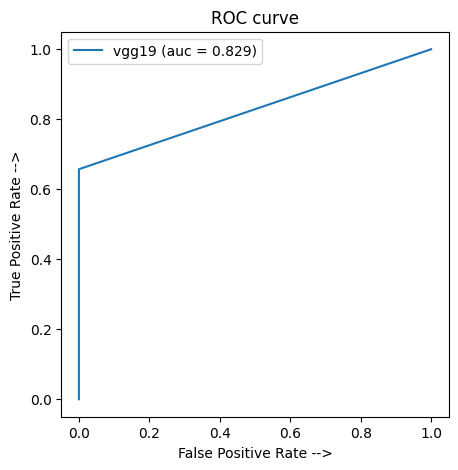

In [29]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(val_data.classes, prediction)
auc_Xception = auc(fpr, tpr)


plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, linestyle='-', label='vgg19 (auc = %0.3f)' % auc_Xception)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.title("ROC curve")
plt.show()

Following is our prediction:
1/1 [==============================] - 0s 23ms/step
(1, 1)
[[7.4501304e-07]]


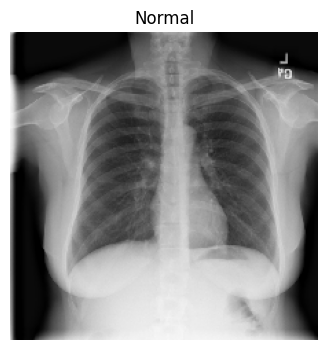

In [40]:
# predicting an image
from keras.preprocessing import image
import numpy as np
from keras.applications import imagenet_utils
image_path = "/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Normal/Normal-350.png"
new_img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
img = tf.keras.utils.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print((prediction.shape))
print(prediction)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

#Another way
# img_class = model.predict_classes(img)
# img_prob = model.predict_proba(img)
# print(img_class ,img_prob )


#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()


# prediction = pretrained_model.predict(img)
# #decode the prediction
# actual_prediction = imagenet_utils.decode_predictions(prediction)

In [30]:
li=list(val_data.class_indices)
li

['Normal', 'Tuberculosis']

In [32]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 63.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.1/288.1 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.9/70.9 kB 7.7 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4712 sha256=4dcef3ea7b0a907fea88bc3372de42437667385aad217938fef8e9473a01eb34
  Stored in directory: /root/.cache/pip/wheels/0c/c2/0e/3b9c6845c6a4e35beb90910cc70d9ac9ab5d47402bd62af0df
Successfully built ffmpy
  Attempting uninstall: mdit-py-plugins
    Found existing installation: mdit-py-plugins 0.3.5
    Uninstalling mdit-py-plugins-0.3.5:
      Successfully uninstalled mdit-py-plugins-0.3.5


In [33]:
import gradio as gr

In [41]:
import numpy as np
class_names=['Normal','Tuberculosis']
def predict_image(img1):
  img1=img1.reshape(224,224,-1)
  img1 = tf.keras.utils.img_to_array(img1)
  img1 = np.expand_dims(img1, axis=0)
  img1 = img1/255
  prediction=model.predict(img1)
  print(prediction)
  m=prediction.flatten()

  if m<0.5:
    d=1-prediction[0]
    print("Normal")
    prediction=np.insert(prediction,0,d)
#     prediction.insert(1,d)
    
  else:
    d=1-prediction[0]
#     prediction.insert(0,d)
    print("TB")
    prediction=np.insert(prediction,0,d)

  print(prediction)
  for i in range(2):
    print(class_names[i],float(prediction[i]))
    
  return {class_names[i]: float(prediction[i]) for i in range(2)}

In [ ]:
image = gr.inputs.Image(shape=(224,224))
label = gr.outputs.Label(num_top_classes=2)

gr.Interface(fn=predict_image, inputs=image,title="Tuberculosis classification", outputs=label,interpretation='default').launch(debug='True')

/opt/conda/lib/python3.10/site-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/opt/conda/lib/python3.10/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/gradio/outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


Kaggle notebooks require sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://740ff4be0895bffb55.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


1/1 [==============================] - 0s 22ms/step
[[3.941009e-06]]
Normal
[9.9999607e-01 3.9410088e-06]
Normal 0.9999960660934448
Tuberculosis 3.941008799301926e-06
1/1 [==============================] - 0s 21ms/step
[[0.9983387]]
TB
[0.0016613 0.9983387]
Normal 0.0016613006591796875
Tuberculosis 0.9983386993408203
